<a href="https://colab.research.google.com/github/munich-ml/MLPy2020/blob/master/17_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pandas** (alias `pd`) is a Python package providing fast, flexible, and expressive data
structures designed to make working with "labeled" data both
easy and intuitive. 

**`pd.DataFrame`** is a two-dimensional data structure with labeled axes, rows (`index`) and `column`. The data is often a `np.array`.

**`pd.Series`** is the one-dimensional version of the `pd.DataFrame`.

In [0]:
import numpy as np
import pandas as pd

# `DataFrame` creation

## cration from `dict`

In [74]:
dict_of_tests = {"linerate":   [6.2, 6.25, 6.3, 6.2, 6.25, 6.3, 6.2, 6.25, 6.2, 6.25],
                 "voltage":    [  3,    3,   3, 3.3,  3.3, 3.3,   3,    3, 3.3,  3.3],
                 "temperature":[ 25,   25,  25,  25,   25,  25,  40,   40,  40,   40],
                 "errors":     [ 12,    0,   0,   3,    0,   0, 234,   57,   0,    0],
                 "current":    [110,  115, 122, 121,  129, 136, 134,  145, 142,  155]}
dict_of_tests

{'current': [110, 115, 122, 121, 129, 136, 134, 145, 142, 155],
 'errors': [12, 0, 0, 3, 0, 0, 234, 57, 0, 0],
 'linerate': [6.2, 6.25, 6.3, 6.2, 6.25, 6.3, 6.2, 6.25, 6.2, 6.25],
 'temperature': [25, 25, 25, 25, 25, 25, 40, 40, 40, 40],
 'voltage': [3, 3, 3, 3.3, 3.3, 3.3, 3, 3, 3.3, 3.3]}

In [0]:
tests = pd.DataFrame(dict_of_tests)

When creating a `DataFrame` from a `dict`, the `keys` are interpreted as `columns`.

`DataFrame` prints are nicely rendered in most Python IDEs, and also in Jupyter...

In [76]:
tests

,linerate,voltage,temperature,errors,current
0,6.20,3.0,25,12,110
1,6.25,3.0,25,0,115
2,6.30,3.0,25,0,122
3,6.20,3.3,25,3,121
4,6.25,3.3,25,0,129
5,6.30,3.3,25,0,136
6,6.20,3.0,40,234,134
7,6.25,3.0,40,57,145
8,6.20,3.3,40,0,142
9,6.25,3.3,40,0,155


### helper code
creating `col_names` and `data` lists from `dict_of_tests`

In [0]:
col_names = [name for name in dict_of_tests.keys()]
data = [[] for _ in range(len(dict_of_tests[next(iter(dict_of_tests))]))]
for values_col in dict_of_tests.values():
    for data_row, value in zip(data, values_col):
        data_row.append(value)

## creation from `list`

In [78]:
col_names

['linerate', 'voltage', 'temperature', 'errors', 'current']

In [79]:
data

[[6.2, 3, 25, 12, 110],
 [6.25, 3, 25, 0, 115],
 [6.3, 3, 25, 0, 122],
 [6.2, 3.3, 25, 3, 121],
 [6.25, 3.3, 25, 0, 129],
 [6.3, 3.3, 25, 0, 136],
 [6.2, 3, 40, 234, 134],
 [6.25, 3, 40, 57, 145],
 [6.2, 3.3, 40, 0, 142],
 [6.25, 3.3, 40, 0, 155]]

In [80]:
pd.DataFrame(data) 

,0,1,2,3,4
0,6.20,3.0,25,12,110
1,6.25,3.0,25,0,115
2,6.30,3.0,25,0,122
3,6.20,3.3,25,3,121
4,6.25,3.3,25,0,129
5,6.30,3.3,25,0,136
6,6.20,3.0,40,234,134
7,6.25,3.0,40,57,145
8,6.20,3.3,40,0,142
9,6.25,3.3,40,0,155


In [81]:
pd.DataFrame(data, columns=col_names) 

,linerate,voltage,temperature,errors,current
0,6.20,3.0,25,12,110
1,6.25,3.0,25,0,115
2,6.30,3.0,25,0,122
3,6.20,3.3,25,3,121
4,6.25,3.3,25,0,129
5,6.30,3.3,25,0,136
6,6.20,3.0,40,234,134
7,6.25,3.0,40,57,145
8,6.20,3.3,40,0,142
9,6.25,3.3,40,0,155


Creating a `DataFrame` is so easy, that it may be done just for the nicely rendered `print`

# Frequently used methods

## `DataFrame.head()`
for a quick glance on a large `DataFrame`

In [82]:
tests.head()

,linerate,voltage,temperature,errors,current
0,6.20,3.0,25,12,110
1,6.25,3.0,25,0,115
2,6.30,3.0,25,0,122
3,6.20,3.3,25,3,121
4,6.25,3.3,25,0,129


## `DataFrame.T`
Transpose index and columns

In [83]:
tests.T

,0,1,2,3,4,5,6,7,8,9
linerate,6.2,6.25,6.3,6.2,6.25,6.3,6.2,6.25,6.2,6.25
voltage,3.0,3.00,3.0,3.3,3.30,3.3,3.0,3.00,3.3,3.30
temperature,25.0,25.00,25.0,25.0,25.00,25.0,40.0,40.00,40.0,40.00
errors,12.0,0.00,0.0,3.0,0.00,0.0,234.0,57.00,0.0,0.00
current,110.0,115.00,122.0,121.0,129.00,136.0,134.0,145.00,142.0,155.00


# Indexing

In [84]:
tests

,linerate,voltage,temperature,errors,current
0,6.20,3.0,25,12,110
1,6.25,3.0,25,0,115
2,6.30,3.0,25,0,122
3,6.20,3.3,25,3,121
4,6.25,3.3,25,0,129
5,6.30,3.3,25,0,136
6,6.20,3.0,40,234,134
7,6.25,3.0,40,57,145
8,6.20,3.3,40,0,142
9,6.25,3.3,40,0,155


## `DataFrame[]`
- `DataFrame[col_label]` --> `Series`
- `DataFrame[list_of_labels]]` --> `DataFrame`


In [85]:
tests[["current"]]

,current
0,110
1,115
2,122
3,121
4,129
5,136
6,134
7,145
8,142
9,155


## DataFrame.loc[]
- Labeled row and columns indexing
- Boolean indexing

In [86]:
rows = [1,2,3]
cols = ["errors", "current"]
tests.loc[rows, cols]

,errors,current
1,0,115
2,0,122
3,3,121


### Boolean indexing
Example: Get all rows with `errors > 0`

In [87]:
tests["errors"] > 0

0     True
1    False
2    False
3     True
4    False
5    False
6     True
7     True
8    False
9    False
Name: errors, dtype: bool

In [88]:
tests.loc[tests["errors"] > 0, :]

,linerate,voltage,temperature,errors,current
0,6.20,3.0,25,12,110
3,6.20,3.3,25,3,121
6,6.20,3.0,40,234,134
7,6.25,3.0,40,57,145


Very compact and readable code!

In [89]:
tests["errors"] > 0

0     True
1    False
2    False
3     True
4    False
5    False
6     True
7     True
8    False
9    False
Name: errors, dtype: bool

## DataFrame.iloc[]
Integer indexing is possible but not recommended for the sake of readability.

In [90]:
tests.iloc[:3, 1:-1]

,voltage,temperature,errors
0,3.0,25,12
1,3.0,25,0
2,3.0,25,0


# `plot`

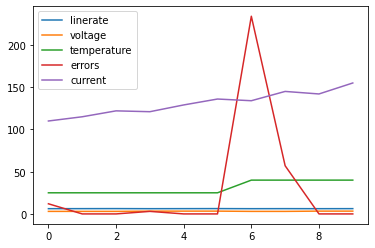

In [91]:
tests.plot();

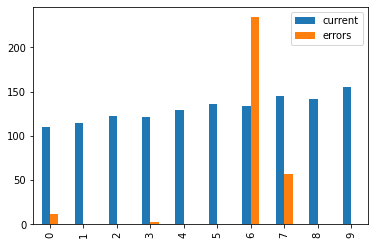

In [92]:
tests[["current", "errors"]].plot(kind="bar");

# `pivot_table`

In [93]:
tests

,linerate,voltage,temperature,errors,current
0,6.20,3.0,25,12,110
1,6.25,3.0,25,0,115
2,6.30,3.0,25,0,122
3,6.20,3.3,25,3,121
4,6.25,3.3,25,0,129
5,6.30,3.3,25,0,136
6,6.20,3.0,40,234,134
7,6.25,3.0,40,57,145
8,6.20,3.3,40,0,142
9,6.25,3.3,40,0,155


In [94]:
tests.pivot_table(index="voltage", columns="linerate", values="errors", aggfunc=np.mean)

linerate,6.20,6.25,6.30
voltage,,,
3.0,123.0,28.5,0.0
3.3,1.5,0.0,0.0


In [95]:
tests.pivot_table(index="linerate", columns="temperature", values="current", 
                  aggfunc=np.mean, fill_value=None)

temperature,25,40
linerate,,
6.20,115.5,138.0
6.25,122.0,150.0
6.30,129.0,NaN
